In [1]:
# Standard library imports
import datetime
import os
import re
import sys
import time

# Third-party library imports for data handling and processing
import emoji
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# NLTK for natural language processing tasks
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Tokenizer for word segmentation
nltk.download('wordnet')  # Lexical database for the English language
nltk.download('stopwords')  # Stopwords to filter out in preprocessing

# TensorFlow and Keras for building and training the neural network model
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, LSTM

from keras.models import Sequential, load_model, save_model, Model
from keras.layers import (Dense, Dropout, Activation, Embedding, Flatten,
                          LSTM, Bidirectional, SpatialDropout1D, Conv1D, MaxPooling1D)
from keras.preprocessing.text import text_to_word_sequence, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
import keras
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Attention, Add
from keras.optimizers import Adam

# Matplotlib for plotting
from matplotlib import pyplot


[nltk_data] Downloading package punkt to
[nltk_data]     /home/UG/kanupriy001/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/UG/kanupriy001/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/UG/kanupriy001/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2023-11-09 13:36:06.887653: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-09 13:36:09.071366: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-09 13:36:09.071406: E tensorflow/compiler/xla/st

In [2]:
import nltk
# Downloading the stopwords collection from NLTK to filter out in our text processing
nltk.download('stopwords')

# Setting the maximum number of words in each sequence for our model
MAX_SEQUENCE_LENGTH = 20
# Defining the size of the embedding vectors
EMBEDDING_DIM = 50

# Importing the stopwords from NLTK to remove common words that usually don't carry much meaning
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 
# Creating a new set of stop words if we need to add more words to the default NLTK list
new_stop_words = set(stop_words)

import pandas as pd

# Reading the preprocessed data from a CSV file into a DataFrame
dataFrame = pd.read_csv('Preprocessed Data.csv', encoding='utf-8')

# Extracting the text column (assuming it's the fourth column) as our input data (features)
x = dataFrame.values[:, 3]
# Extracting the target/output column (assuming it's the second column) for our labels
y = dataFrame.values[:, 1]


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/UG/kanupriy001/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
x,y

(array(['anger', 'anger', 'anger', ..., 'love', 'joy', 'love'],
       dtype=object),
 array([0, 1, 2, ..., 43957, 43958, 43959], dtype=object))

In [4]:
dataFrame.head()

,Unnamed: 0,index,tweet,tweettype,tweettype2,charCount,wordCount,sentenceCount,capCharCount,capWordCount,...,\ count,] count,^ count,_ count,` count,{ count,| count,} count,~ count,lemmatizedText
0,0,0,@ZubairSabirPTI pls dont insult the word 'Molna',anger,negative,49,7,1,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pls dont insult word
1,1,1,@ArcticFantasy I would have almost took offens...,anger,negative,81,14,1,4,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,would almost take offense actually snap
2,2,2,@IllinoisLoyalty that Rutgers game was an abom...,anger,negative,114,20,3,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rutgers game abomination affront god man must ...
3,3,3,@CozanGaming that's what lisa asked before she...,anger,negative,90,16,2,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,lisa ask start rag call heh
4,4,4,Sometimes I get mad over something so minuscul...,anger,negative,133,25,1,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sometimes get mad something minuscule try ruin...


In [5]:
dataFrame.columns

Index(['Unnamed: 0', 'index', 'tweet', 'tweettype', 'tweettype2', 'charCount',
       'wordCount', 'sentenceCount', 'capCharCount', 'capWordCount',
       'quotedWordCount', 'stopwordCount', 'uniqueWordCount', 'hashCount',
       'mentionCount', 'avgWordLen', 'modTweet', '! count', '" count',
       '# count', '$ count', '% count', '& count', '' count', '( count',
       ') count', '* count', '+ count', ', count', '- count', '. count',
       '/ count', ': count', '; count', '< count', '= count', '> count',
       '? count', '@ count', '[ count', '\ count', '] count', '^ count',
       '_ count', '` count', '{ count', '| count', '} count', '~ count',
       'lemmatizedText'],
      dtype='object')

In [6]:
x_data=list(dataFrame['lemmatizedText'])
y_data=list(dataFrame['tweettype'])

In [7]:
x_data[:10],y_data[:10]

(['pls dont insult word',
  'would almost take offense actually snap',
  'rutgers game abomination affront god man must never speak',
  'lisa ask start rag call heh',
  'sometimes get mad something minuscule try ruin somebody life like lose job like get federal prison',
  'sometimes get mad something minuscule try ruin somebody life like lose job like get federal prison anger',
  'think canaday amp must actually work like amp brady havent get snap chat video today',
  'eye dilate hate world right rage thousand fiery dragon need drink',
  'one choose clp member mp seat people dole mate elect candidate fume',
  'one choose clp member mp seat people dole mate elect candidate'],
 ['anger',
  'anger',
  'anger',
  'anger',
  'anger',
  'anger',
  'anger',
  'anger',
  'anger',
  'anger'])

#### Preprocessing Pipeline
The provided code is a preprocessing pipeline for an emotion recognition task from text data. It starts by encoding emotion labels into numerical classes and one-hot encoding them for model training. It then cleans the tweets by lowercasing, removing URLs, stock symbols, usernames, and non-letter characters. After that, it lemmatizes the text, stripping words down to their base forms while also removing stopwords. The processed text is tokenized into sequences, which are then padded to a uniform length to prepare for input into a machine learning model. Finally, the data is split into training and test sets, ready for the next steps in building an emotion classification model.

In [8]:
import tensorflow as tf
import re
# Added in to avoid formatting error
labels = np.array(dataFrame['tweettype'])
y = []
for i in range(len(labels)):
    if labels[i] == 'sadness':
        y.append(0)
    elif labels[i] == 'neutral':
        y.append(1)
    elif labels[i] == 'joy':
        y.append(2)
    elif labels[i] == 'love':
        y.append(3)
    elif labels[i] == 'enthusiasm':
        y.append(4)
    elif labels[i] == 'anger':
        y.append(5)
    elif labels[i] == 'surprise':
        y.append(6)
    elif labels[i] == 'relief':
        y.append(7)
    elif labels[i] == 'fear':
        y.append(8)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 9, dtype="float32")
del y


def featureEngineering(tweet):
    # Lower case tweet
    tweetMod = tweet.lower()
    # Replace URLs with a space in the message
    tweetMod = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweetMod)
    # Replace ticker symbols with a space. The ticker symbols are any stock symbol that starts with $.
    tweetMod = re.sub('\$[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace StockTwits usernames with a space. The usernames are any word that starts with @.
    tweetMod = re.sub('\@[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace everything not a letter or apostrophe with a space
    tweetMod = re.sub('[^a-zA-Z\']', ' ', tweetMod)
    # Remove single letter words
    tweetMod = ' '.join([w for w in tweetMod.split() if len(w) > 1])

    return tweetMod

tweetData=dataFrame

# Process for all tweets
tweetData['modTweet'] = [featureEngineering(tweet) for tweet in tweetData['tweet']]

def lemmatizeTweet(tweet):
  words = [word for word in word_tokenize(tweet) if (word.isalpha()==1)]
  # Remove stop words
  stop = set(stopwords.words('english'))
  words = [word for word in words if (word not in stop)]
  # Lemmatize words (first noun, then verb)
  wnl = nltk.stem.WordNetLemmatizer()
  lemmatized = [wnl.lemmatize(wnl.lemmatize(word, 'n'), 'v') for word in words]
  return " ".join(lemmatized)

tweetData['lemmatizedText'] = tweetData["modTweet"].apply(lambda x:lemmatizeTweet(x))

tokenizer = Tokenizer(num_words=27608, split=' ')
tokenizer.fit_on_texts(tweetData['lemmatizedText'].values)
X = tokenizer.texts_to_sequences(tweetData['lemmatizedText'].values)
X = pad_sequences(X, padding='post')



In [9]:
X

array([[ 1487,    93,  1706, ...,     0,     0,     0],
       [   44,   242,    45, ...,     0,     0,     0],
       [11889,   192,  8085, ...,     0,     0,     0],
       ...,
       [   16,    27,     3, ...,     0,     0,     0],
       [ 2611,   275,    85, ...,     0,     0,     0],
       [ 4886,   456,  2760, ...,     0,     0,     0]], dtype=int32)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [11]:

#Loading Pre-trained GloVe Word Embeddings
#These word embeddings will provide a dense representation of words with semantic meanings, which can significantly improve the performance of machine learning models on NLP tasks.
print("Loading Glove Vectors ...")
embeddings_index = {}
word_index = tokenizer.word_index
len(word_index)
f = open(os.path.join('', 'glove.6B.50d.txt'),'r',encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Loaded GloVe Vectors Successfully')


Loading Glove Vectors ...
Loaded GloVe Vectors Successfully


In [12]:
#Creating the Embedding Matrix and Layer for the Model

embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

print("Embedding Matrix Generated : ",embedding_matrix.shape)



embedding_layer = Embedding(len(word_index) + 1,EMBEDDING_DIM, weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False)




Embedding Matrix Generated :  (27614, 50)


In [13]:
#Populating the GloVe Embeddings Dictionary


embeddings_index = {}
word_index = tokenizer.word_index
len(word_index)
f = open('glove.6B.50d.txt', 'r', encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))


Loaded 400000 word vectors.


In [14]:
#Constructing the Embedding Matrix with GloVe Vectors

embedding_dim = 50  

embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [15]:
#Setting Up Early Stopping Callback
#This technique helps prevent overfitting by stopping the training when the model performance no longer improves on a held-out validation set.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]

### Building and Training the Text Classification Model (LSTM + CNN)
This model is a hybrid neural network designed for text emotion classification that combines convolutional layers with bidirectional LSTM layers. The convolutional layers extract local patterns within the text, while the bidirectional LSTMs capture long-range dependencies in the data. The model uses pre-trained GloVe word embeddings to understand word semantics and employs attention mechanisms to focus on relevant parts of the text sequence. Dropout layers are included to mitigate overfitting, and the model's output is a probability distribution across different emotion classes, obtained through a softmax activation function. The architecture is designed to leverage both the local features of the text and its sequential nature, making it suitable for text emotion recognition.

In [18]:
from keras.layers import Embedding, Dropout, Dense, Input, Bidirectional, LSTM, Conv1D, GlobalMaxPooling1D, Concatenate, Reshape
# Clear any previous session
keras.backend.clear_session()

# Define the input layer
input_text = Input(shape=(X.shape[1],))

# Embedding layer
x = Embedding(input_dim=len(word_index) + 1,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=X.shape[1],
              trainable=False)(input_text)

# CNN layers for local feature extraction
conv_blocks = []
filter_sizes = [3, 4, 5]

for sz in filter_sizes:
    conv = Conv1D(filters=128, kernel_size=sz, activation='relu', padding='same')(x)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)

# Concatenate the convolutions
x = Concatenate()(conv_blocks)

# Add a dropout layer
x = Dropout(0.5)(x)

# Reshape for RNN layers
x = Reshape((1, -1))(x)  # This reshape is necessary because RNN expects 3 dimensions (batch_size, timesteps, features)

# First LSTM layer
x = Bidirectional(LSTM(units=256, return_sequences=True))(x)  # Set return_sequences=True when stacking LSTM layers
query_value_attention_seq = Attention()([x, x])
x = Add()([x, query_value_attention_seq])
# Add a dropout layer
x = Dropout(0.5)(x)

# Second LSTM layer
x = Bidirectional(LSTM(units=128, return_sequences=True))(x)
query_value_attention_seq = Attention()([x, x])
x = Add()([x, query_value_attention_seq])
x = Dropout(0.5)(x)

x = Flatten()(x)

# Classification layer
output = Dense(9, activation='softmax')(x)

# Final model assembly
model = Model(inputs=input_text, outputs=output)

# Define the optimizer
optimizer = Adam(lr=0.001)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

# Print the model summary
model.summary()


# Train the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=512, validation_data=(X_test, Y_test), callbacks=callbacks_list)


2023-11-09 13:40:35.732179: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 28, 50)               1380700   ['input_1[0][0]']             
                                                                                                  
 conv1d (Conv1D)             (None, 28, 128)              19328     ['embedding[0][0]']           
                                                                                                  
 conv1d_1 (Conv1D)           (None, 28, 128)              25728     ['embedding[0][0]']           
                                                                                              

2023-11-09 13:40:49.590149: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:693] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "101" frequency: 2600 num_cores: 2 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 1048576 l3_cache_size: 25952256 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }
2023-11-09 13:40:49.591663: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:693] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "101" frequency: 2600 num_cores: 2 environment { key: "cpu_instruction_set" value: "AVX SSE

69/69 [==============================] - ETA: 0s - loss: 1.8650 - categorical_accuracy: 0.3426

2023-11-09 13:41:11.946837: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:693] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "101" frequency: 2600 num_cores: 2 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 1048576 l3_cache_size: 25952256 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }
2023-11-09 13:41:11.947697: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:693] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "101" frequency: 2600 num_cores: 2 environment { key: "cpu_instruction_set" value: "AVX SSE

69/69 [==============================] - 36s 315ms/step - loss: 1.8650 - categorical_accuracy: 0.3426 - val_loss: 1.7322 - val_categorical_accuracy: 0.3894
Epoch 2/50
69/69 [==============================] - 18s 268ms/step - loss: 1.7432 - categorical_accuracy: 0.3813 - val_loss: 1.6762 - val_categorical_accuracy: 0.4003
Epoch 3/50
69/69 [==============================] - 18s 268ms/step - loss: 1.6867 - categorical_accuracy: 0.4014 - val_loss: 1.6329 - val_categorical_accuracy: 0.4227
Epoch 4/50
69/69 [==============================] - 20s 290ms/step - loss: 1.6507 - categorical_accuracy: 0.4169 - val_loss: 1.6182 - val_categorical_accuracy: 0.4241
Epoch 5/50
69/69 [==============================] - 18s 267ms/step - loss: 1.6265 - categorical_accuracy: 0.4269 - val_loss: 1.6084 - val_categorical_accuracy: 0.4266
Epoch 6/50
69/69 [==============================] - 18s 267ms/step - loss: 1.6083 - categorical_accuracy: 0.4314 - val_loss: 1.5967 - val_categorical_accuracy: 0.4365
Epoch 7/5

In [19]:
model.save('models/LSTM_CNN')

INFO:tensorflow:Assets written to: models/LSTM_CNN/assets


INFO:tensorflow:Assets written to: models/LSTM_CNN/assets


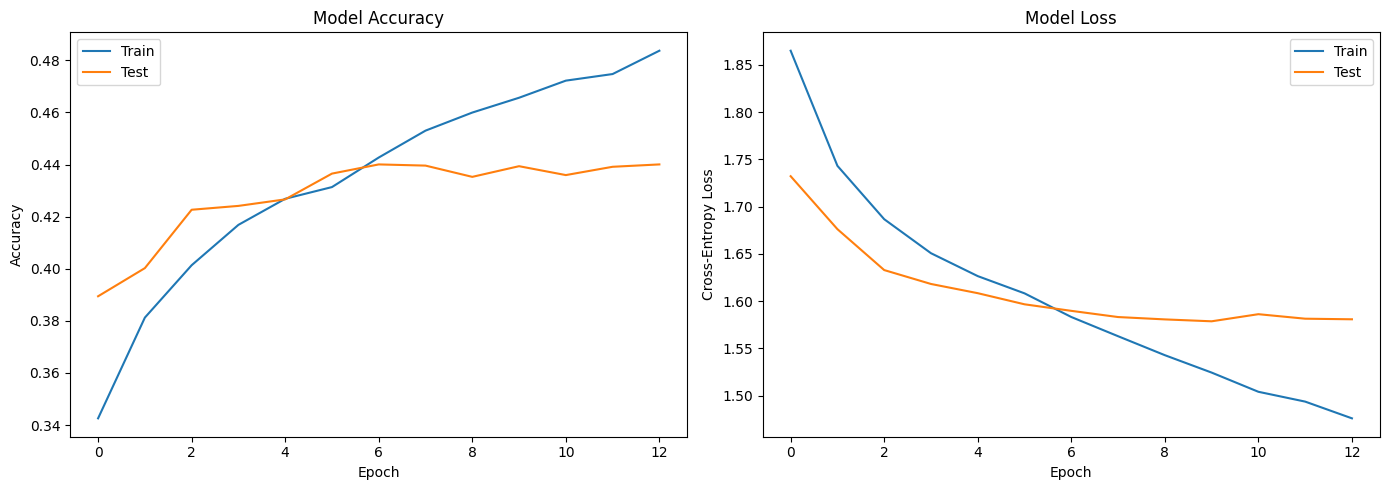

In [20]:
#plotting accuracy & loss
plt.figure(figsize=(14, 5)) 


plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'], label='Train')
plt.plot(history.history['val_categorical_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout() 
plt.show()



In [22]:
# To print the best training accuracy
best_train_accuracy = max(history.history['categorical_accuracy'])
print(f"Best Training Accuracy: {best_train_accuracy:.4f}")

# To print the best validation (test) accuracy
best_val_accuracy = max(history.history['val_categorical_accuracy'])
print(f"Best Validation (Test) Accuracy: {best_val_accuracy:.4f}")

Best Training Accuracy: 0.4837
Best Validation (Test) Accuracy: 0.4401
